In [1]:
import perceval as pcvl
from perceval import Circuit
from perceval.components import BS, PERM, Port
from perceval.utils import Encoding, PostSelect
import math
import numpy as np
import perceval.components as comp
from perceval.rendering.circuit import SymbSkin, PhysSkin

In [2]:
# 30 phase shift params in generator
phi = math.pi / 2
gen_params = []
for i in range(30):
    pname = "phi" + str(i)
    param = pcvl.P(pname)
    param.set_value(phi)
    gen_params.append(param)
theta = math.pi/2
generator = pcvl.Circuit(8)

# 12 phase shift params in discriminator
discrim_params = []
for i in range(12):
    pname = "phi" + str(i)
    param = pcvl.P(pname)
    param.set_value(phi)
    discrim_params.append(param)

In [3]:
theta = math.pi/2
generator = pcvl.Circuit(8)

generator.add(1, comp.PS(gen_params[0]))
generator.add(2, comp.PS(gen_params[1]))
generator.add(3, comp.PS(gen_params[2]))
generator.add(1, comp.BS(theta))
generator.add(1, comp.PS(gen_params[3]))
generator.add(1, comp.BS(theta))
generator.add(0, comp.BS(theta))
generator.add(2, comp.BS(theta))
generator.add(0, comp.PS(gen_params[4]))
generator.add(0, comp.BS(theta))
generator.add(2, comp.PS(gen_params[5]))
generator.add(2, comp.BS(theta))
generator.add(1, comp.PS(gen_params[6]))
generator.add(1, comp.BS(theta))
generator.add(1, comp.PS(gen_params[7]))
generator.add(1, comp.BS(theta))
generator.add(0, comp.PS(gen_params[8]))
generator.add(2, comp.PS(gen_params[9]))
generator.add(0, comp.BS(theta))
generator.add(2, comp.BS(theta))
generator.add(0, comp.PS(gen_params[10]))
generator.add(0, comp.BS(theta))
generator.add(2, comp.PS(gen_params[11]))
generator.add(2, comp.BS(theta))
generator.add(0, comp.PS(gen_params[12]))
generator.add(1, comp.PS(gen_params[13]))
generator.add(2, comp.PS(gen_params[14]))


generator.add(5, comp.PS(gen_params[15]))
generator.add(6, comp.PS(gen_params[16]))
generator.add(7, comp.PS(gen_params[17]))   
generator.add(5, comp.BS(theta))
generator.add(5, comp.PS(gen_params[18]))
generator.add(5, comp.BS(theta))
generator.add(4, comp.BS(theta))
generator.add(6, comp.BS(theta))
generator.add(4, comp.PS(gen_params[19]))
generator.add(4, comp.BS(theta))
generator.add(6, comp.PS(gen_params[20]))
generator.add(6, comp.BS(theta))
generator.add(5, comp.PS(gen_params[21]))
generator.add(5, comp.BS(theta))
generator.add(5, comp.PS(gen_params[22]))
generator.add(5, comp.BS(theta))
generator.add(4, comp.PS(gen_params[23]))
generator.add(6, comp.PS(gen_params[24]))
generator.add(4, comp.BS(theta))
generator.add(6, comp.BS(theta))
generator.add(4, comp.PS(gen_params[25]))
generator.add(4, comp.BS(theta))
generator.add(6, comp.PS(gen_params[26]))
generator.add(6, comp.BS(theta))
generator.add(4, comp.PS(gen_params[27]))
generator.add(5, comp.PS(gen_params[28]))
generator.add(6, comp.PS(gen_params[29]))

In [5]:
theta = math.pi/2
discriminator = pcvl.Circuit(8)

discriminator.add(0, comp.PS(discrim_params[0]))
discriminator.add(1, comp.PS(discrim_params[1]))
discriminator.add(2, comp.PS(discrim_params[2]))

discriminator.add((0, 1), comp.BS(theta))
discriminator.add((2, 3), comp.BS(theta))

discriminator.add(0, comp.PS(discrim_params[3]))
discriminator.add(2, comp.PS(discrim_params[4]))

discriminator.add((0, 1), comp.BS(theta))
discriminator.add((2, 3), comp.BS(theta))

discriminator.add((1, 2), comp.BS(theta))

discriminator.add(1, comp.PS(discrim_params[5]))

discriminator.add((1, 2), comp.BS(theta))

discriminator.add(4, comp.PS(discrim_params[6]))
discriminator.add(5, comp.PS(discrim_params[7]))
discriminator.add(6, comp.PS(discrim_params[8]))

discriminator.add((4, 5), comp.BS(theta))
discriminator.add((6, 7), comp.BS(theta))

discriminator.add(4, comp.PS(discrim_params[9]))
discriminator.add(6, comp.PS(discrim_params[10]))

discriminator.add((4, 5), comp.BS(theta))
discriminator.add((6, 7), comp.BS(theta))

discriminator.add((5, 6), comp.BS(theta))

discriminator.add(5, comp.PS(discrim_params[11]))

discriminator.add((5, 6), comp.BS(theta))

In [6]:
from perceval.components import catalog
print(catalog.list())

['klm cnot', 'heralded cnot', 'postprocessed cnot', 'heralded cz', 'generic 2 mode circuit', 'mzi phase first', 'mzi phase last', 'postprocessed ccz', 'toffoli']


In [7]:
def generate(phase_shift_angles, input_vec):
    for i in range(30):
        gen_params[i].set_value(phase_shift_angles[i])
    g_processor = pcvl.Processor("SLOS", generator)
    g_processor.with_input(input_vec)
    g_sampler = pcvl.algorithm.Sampler(g_processor)

    return g_sampler

In [8]:
def discriminate(phase_discriminate_angles, input_vec):
    for i in range(12):
        discrim_params[i].set_value(phase_discriminate_angles[i])
    d_processor = pcvl.Processor("SLOS", discriminator)
    d_processor.with_input(input_vec)
    d_sampler = pcvl.algorithm.Sampler(d_processor) 

    return d_sampler

In [9]:
phase_shift_angles = [phi]*30
phase_discriminate_angles = [phi]*12
# test

st1 = pcvl.StateVector("|1,0,0,0,1,0,0,0>")
st2 = pcvl.StateVector("|0,1,0,0,0,1,0,0>")
st3 = pcvl.StateVector("|0,0,1,0,0,0,1,0>")
st4 = pcvl.StateVector("|0,0,0,1,0,0,0,1>")
stf = st1 + st2 + st3 + st4

t1 = pcvl.StateVector("|1,0,0,0,0,1,0,0>")
t2 = pcvl.StateVector("|0,1,0,0,0,0,1,0>")
t3 = pcvl.StateVector("|0,0,1,0,0,0,0,1>")
t4 = pcvl.StateVector("|0,0,0,1,1,0,0,0>")
tau = t1 + t2 + t3 + t4

print(generate(phase_shift_angles, stf).samples(1)['results'][0])
print(discriminate(phase_discriminate_angles, generate(phase_shift_angles, stf).samples(1)['results'][0]).samples(1)['results'][0])

|0,0,1,0,0,0,1,0>
|0,0,0,1,0,0,1,0>


In [10]:
#all imports

import perceval as pcvl
import math
import numpy as np

# calculate the loss function

def calculate_loss(generator_angles, discriminator_angles): #for minimizing from an ungenerated vector
  for i in range(30):
    gen_params[i].set_value(generator_angles[i])
  for i in range(12):
    discrim_params[i].set_value(discriminator_angles[i])
  g_sampler = generate(generator_angles, stf)
  g_sample = g_sampler.samples(1)['results'][0]
  d_sampler = discriminate(discriminator_angles, g_sample)
  dist1 = d_sampler.probs()['results'][pcvl.BasicState("|0, 1, 0, 0, 0, 1, 0, 0>")]

  tau_d_sampler = discriminate(discriminator_angles, tau)
  dist2 = tau_d_sampler.probs()['results'][pcvl.BasicState("|0, 1, 0, 0, 0, 1, 0, 0>")]

  return abs(dist1 - dist2), dist1, dist2



phase_actual_angles = np.array([0.87700001, 1.29945375, 1.22958453, 0.80825399, 1.32367853, 1.24938575,
 1.52368353, 1.39377473, 1.00303004, 0.64323807, 1.35395096, 1.43155562])



In [26]:
# Tracks our loss function as we train
loss_tracker = []
th_state = ["|1, 0, 0, 0, 0, 1, 0, 0>", "|0, 1, 0, 0, 0, 0, 1, 0>", "|0, 0, 1, 0, 0, 0, 0, 1>", "|0, 0, 0, 1, 1, 0, 0, 0>"]
fidelity_scores = []
gen_scores = []
tau_scores = []

def training_generator(phase_shift_angles, epochs, d_theta):
  for epoch in range(0, epochs):
    for index in range(len(phase_shift_angles)):
      generate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
      theta_plus = phase_shift_angles.copy()
      theta_plus[index] = phase_shift_angles[index] + d_theta
      theta_minus = phase_shift_angles.copy()
      theta_minus[index] = phase_shift_angles[index] - d_theta
      slope = (calculate_loss(theta_plus, phase_discriminate_angles)[0] - calculate_loss(theta_minus, phase_discriminate_angles)[0]) / (2*d_theta)
      slope = round(slope, 4)
      generate_gradient[index] += slope
      # print(slope)
      # print(generate_gradient)
  generate_gradient = generate_gradient / epochs
  phase_shift_angles = phase_shift_angles - generate_gradient * d_theta
  loss, gen, discrim = calculate_loss(phase_shift_angles, phase_discriminate_angles)
  loss_tracker.append(loss)
  gen_scores.append(gen)
  tau_scores.append(discrim)
  g_sampler = generate(phase_shift_angles, stf)
  fidelity = 0
  for state in th_state:
      fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
  fidelity_scores.append(fidelity)
  print("Generator:")
  print(phase_shift_angles)
  return phase_shift_angles

def training_discriminator(phase_discriminate_angles, epochs, d_theta):
  
  for epoch in range(0, epochs):
    for index in range(len(phase_discriminate_angles)):
      discriminate_gradient = np.array([0.0,0,0,0,0,0,0,0,0,0,0,0])
      theta_plus = phase_discriminate_angles.copy()
      theta_plus[index] = phase_discriminate_angles[index] + d_theta
      theta_minus = phase_discriminate_angles.copy()
      theta_minus[index] = phase_discriminate_angles[index] + d_theta
      slope = (calculate_loss(phase_shift_angles, theta_plus)[0] - calculate_loss(phase_shift_angles, theta_minus)[0]) / (2*d_theta)
      slope = round(slope, 4)
      discriminate_gradient[index] += slope
  discriminate_gradient = discriminate_gradient / epochs
  phase_discriminate_angles = phase_discriminate_angles + discriminate_gradient * d_theta
  loss, gen, discrim = calculate_loss(phase_shift_angles, phase_discriminate_angles)
  loss_tracker.append(loss)
  gen_scores.append(gen)
  tau_scores.append(discrim)
  g_sampler = generate(phase_shift_angles, stf)
  fidelity = 0
  for state in th_state:
      fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
  fidelity_scores.append(fidelity)
  print("Discriminator:")
  print(phase_discriminate_angles)
  return phase_discriminate_angles

In [27]:
# Train the parameters
x = 0
while x < 100:
  print("Epoch: " + str(x))
  phase_discriminate_angles = training_discriminator(phase_discriminate_angles, 25, 0.05)
  phase_shift_angles = training_generator(phase_shift_angles, 25, 0.05)

  x = x+1

Epoch: 0
Discriminator:
[1.61388133 1.55127633 1.58742133 1.52076633 1.55206133 1.55423133
 1.63150133 1.61519133 1.53043633 1.64295133 1.58830633 1.64015593]
Generator:
[1.42985633 1.56569633 1.51732633 1.49955133 1.63154133 1.59193133
 1.62554633 1.54398633 1.47687633 1.56163133 1.62871633 1.51696133
 1.52022633 1.60400633 1.64487633 1.51709133 1.57105633 1.50328133
 1.56450633 1.67424633 1.41920633 1.65094133 1.51698133 1.61125633
 1.49959133 1.54604133 1.54864133 1.48822133 1.49875633 1.53282273]
Epoch: 1
Discriminator:
[1.61388133 1.55127633 1.58742133 1.52076633 1.55206133 1.55423133
 1.63150133 1.61519133 1.53043633 1.64295133 1.58830633 1.64006093]
Generator:
[1.42985633 1.56569633 1.51732633 1.49955133 1.63154133 1.59193133
 1.62554633 1.54398633 1.47687633 1.56163133 1.62871633 1.51696133
 1.52022633 1.60400633 1.64487633 1.51709133 1.57105633 1.50328133
 1.56450633 1.67424633 1.41920633 1.65094133 1.51698133 1.61125633
 1.49959133 1.54604133 1.54864133 1.48822133 1.49875633 

In [18]:
# Calculate the fidelity by projecting onto tau
th_state = ["|1, 0, 0, 0, 0, 1, 0, 0>", "|0, 1, 0, 0, 0, 0, 1, 0>", "|0, 0, 1, 0, 0, 0, 0, 1>", "|0, 0, 0, 1, 1, 0, 0, 0>"]
g_sampler = generate(phase_shift_angles, stf)
fidelity = 0
for state in th_state:
    fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
print(fidelity)

0.3129623509229302


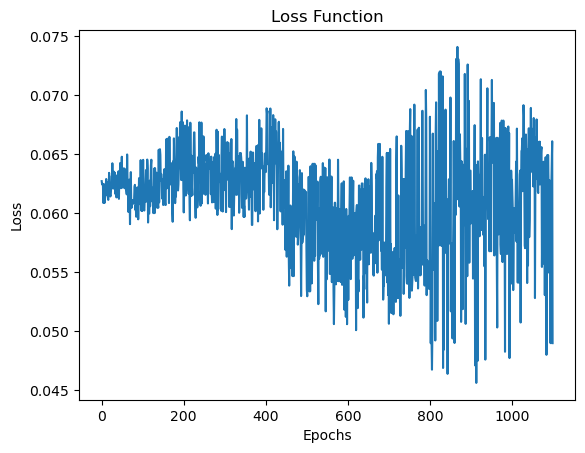

In [19]:
import matplotlib.pyplot as plt
plt.plot(loss_tracker)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Function')
plt.show()

Text(0.5, 1.0, 'Generator and Discriminator Scores')

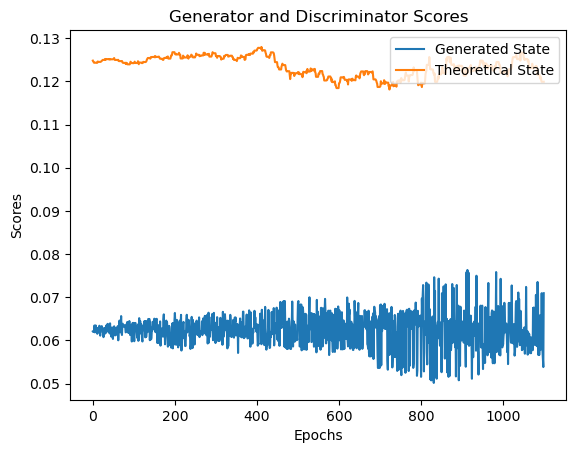

In [20]:
# Plot the generator and discriminator scores
plt.plot(gen_scores)
plt.plot(tau_scores)
plt.xlabel('Epochs')
plt.legend(['Generated State', 'Theoretical State'], loc='upper right')
plt.ylabel('Scores')
plt.title('Generator and Discriminator Scores')


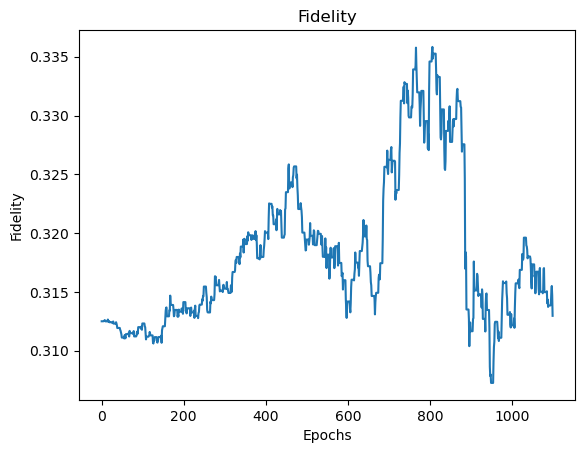

In [21]:
# Plot the fidelity
plt.plot(fidelity_scores)
plt.xlabel('Epochs')
plt.ylabel('Fidelity')
plt.title('Fidelity')
plt.show()

In [235]:
# Saving some generator weights that have very high fidelity measure
really_good_weights = [1.47792293, 1.49078223, 1.44426633, 1.10679943, 1.93115503,
       1.53476983, 1.22454473, 2.11418663, 2.24614793, 2.11267583,
       1.52300323, 1.69297423, 1.56107503, 1.50252823, 1.56577133,
       1.48060163, 1.45246733, 1.39190153, 2.00855323, 1.30646613,
       1.19894733, 2.26236873, 0.64821883, 0.97429743, 1.25474383,
       0.93633533, 2.26012883, 1.48809073, 1.55374773, 1.69510973]

In [236]:
# This is sort of a cheat way to generate high fidelity measures
# Train with fidelity instead of our loss function.

def calculate_fidelity(generator_angles):
    g_sampler = generate(generator_angles, stf)
    fidelity = 0
    for state in th_state:
        fidelity += g_sampler.probs()['results'][pcvl.BasicState(state)]
    return fidelity 

def fidelity_generator(phase_shift_angles, epochs, d_theta):
  for epoch in range(0, epochs):
    for index in range(len(phase_shift_angles)):
      theta_plus = phase_shift_angles.copy()
      theta_plus[index] = phase_shift_angles[index] + d_theta
      theta_minus = phase_shift_angles.copy()
      theta_minus[index] = phase_shift_angles[index] - d_theta
      slope = (calculate_fidelity(theta_plus) - calculate_fidelity(theta_minus)) / (2*d_theta)
      slope = round(slope, 4)
      generate_gradient[index] = slope
      # print(slope)
      # print(generate_gradient)
    phase_shift_angles = phase_shift_angles + generate_gradient * d_theta
    print(calculate_fidelity(phase_shift_angles))
  # print("Generator:")
  # print(phase_shift_angles)
  return phase_shift_angles

for i in range(100):
  print("Epoch: " + str(i))
  phase_shift_angles = fidelity_generator(phase_shift_angles, 5, 0.05)

Epoch: 0
0.3194550975723775
0.32667641018121496
0.33399496544172574
0.34140824381453644
0.3489084506783149
Epoch: 1
0.35649082083029626
0.36414958541427034
0.3718777277675911
0.3796692336399332
0.38751968801531544
Epoch: 2
0.39542258892013454
0.40336782850196534
0.41135220336582345


KeyboardInterrupt: 

In [219]:
max_entangled_states = ["|1, 0, 0, 0, 1, 0, 0, 0>", "|0, 1, 0, 0, 0, 1, 0, 0>", "|0, 0, 1, 0, 0, 0, 1, 0>", "|0, 0, 0, 1, 0, 0, 0, 1>"]
# The desired state, |1,1>
# max_entangled_states = ["|0, 1, 0, 0, 0, 1, 0, 0>"]
def cheat_loss(phase_discriminate_angles):
    loss = 0
    d_sampler = discriminate(phase_discriminate_angles, tau)
    for state in max_entangled_states:
        loss += d_sampler.probs()['results'][pcvl.BasicState(state)]
    return loss

def cheat_discriminator(phase_discriminate_angles, epochs, d_theta):
  for epoch in range(0, epochs):
    for index in range(len(phase_discriminate_angles)):
      theta_plus = phase_discriminate_angles.copy()
      theta_plus[index] = phase_discriminate_angles[index] + d_theta
      theta_minus = phase_discriminate_angles.copy()
      theta_minus[index] = phase_discriminate_angles[index] - d_theta
      slope = (cheat_loss(theta_plus) - cheat_loss(theta_minus)) / (2*d_theta)
      slope = round(slope, 4)
      discriminate_gradient[index] = slope
    phase_discriminate_angles = phase_discriminate_angles + discriminate_gradient * d_theta
    print(cheat_loss(phase_discriminate_angles))
  return phase_discriminate_angles

for i in range(100):
    print("Epoch: " + str(i))
    phase_discriminate_angles = cheat_discriminator(phase_discriminate_angles, 5, 0.05)

Epoch: 0
0.9999990793958277
0.9999990964767904
0.9999991121216734
0.9999991275790571
0.9999991428489413
Epoch: 1
0.9999991579313263
0.9999991728262113
0.9999991875335972
0.9999992020534838
0.9999992163858704
Epoch: 2
0.9999992305307577
0.9999992444881458
0.9999992582580338
0.9999992718404225
0.9999992840304816
Epoch: 3
0.999999294854773
0.9999993055728146
0.9999993161846064
0.9999993266901486
0.999999337089441
Epoch: 4
0.9999993473824835
0.9999993575692765
0.9999993676498194
0.999999377624113
0.9999993874921562
Epoch: 5
0.9999993972539504
0.9999994091638915
0.9999994187319359
0.9999994281937302
0.9999994398036725
Epoch: 6
0.9999994490717169
0.9999994574989937
0.9999994673414617
0.9999994748951574
0.9999994823863532
Epoch: 7
0.999999489815049
0.9999994971812453
0.9999995044849415
0.9999995117261374
0.9999995189048339
Epoch: 8
0.9999995260210306
0.9999995330747269
0.9999995400659236
0.9999995469946203
0.9999995538608173
Epoch: 9
0.9999995606645143
0.9999995674057115
0.9999995740844086
0.

KeyboardInterrupt: 

In [241]:
d_sampler = discriminate(phase_discriminate_angles, tau)
d_sampler.probs()

{'results': BSDistribution(float,
                {|0,0,0,1,1,0,0,0>: 0.0003344157867888746,
                 |0,1,0,0,0,0,0,1>: 0.0059368573890683195,
                 |0,0,1,0,0,0,1,0>: 0.027360613941557147,
                 |0,0,0,1,0,0,1,0>: 0.13466443841566736,
                 |0,0,1,0,0,1,0,0>: 0.03625395595781059,
                 |0,0,1,0,1,0,0,0>: 0.16136224866732918,
                 |0,1,0,0,0,1,0,0>: 0.14451675390995697,
                 |0,1,0,0,1,0,0,0>: 0.05179571845977233,
                 |0,0,0,1,0,1,0,0>: 0.05711038136258231,
                 |0,0,1,0,0,0,0,1>: 0.02502318143330307,
                 |0,1,0,0,0,0,1,0>: 0.04775067024120245,
                 |1,0,0,0,0,0,0,1>: 0.16114919674266723,
                 |1,0,0,0,0,0,1,0>: 0.040224277401573,
                 |1,0,0,0,0,1,0,0>: 0.012118908769650168,
                 |1,0,0,0,1,0,0,0>: 0.036507617086109674,
                 |0,0,0,1,0,0,0,1>: 0.05789076443496142}),
 'physical_perf': 1,
 'logical_perf': 1}

In [302]:
# GAN but with tomography?

# custom loss function that fully measures the output of the discriminator
def calculate_loss(generator_angles, discriminator_angles): #for minimizing from an ungenerated vector
  for i in range(30):
    gen_params[i].set_value(generator_angles[i])
  for i in range(12):
    discrim_params[i].set_value(discriminator_angles[i])
  g_sampler = generate(generator_angles, stf)
  g_sample = g_sampler.samples(1)['results'][0]
  d_sampler = discriminate(discriminator_angles, g_sample)
  dist1 = 0
  for state in max_entangled_states:
        dist1 += d_sampler.probs()['results'][pcvl.BasicState(state)]

  tau_d_sampler = discriminate(discriminator_angles, tau)
  dist2 = 0
  for state in max_entangled_states:
        dist2 += tau_d_sampler.probs()['results'][pcvl.BasicState(state)]

  return abs(dist1 - dist2)

def training_generator(phase_shift_angles, epochs, d_theta):
  for epoch in range(0, epochs):
    for index in range(len(phase_shift_angles)):
      theta_plus = phase_shift_angles.copy()
      theta_plus[index] = phase_shift_angles[index] + d_theta
      theta_minus = phase_shift_angles.copy()
      theta_minus[index] = phase_shift_angles[index] - d_theta
      slope = (calculate_loss(theta_plus, phase_discriminate_angles) - calculate_loss(theta_minus, phase_discriminate_angles)) / (2*d_theta)
      slope = round(slope, 4)
      generate_gradient[index] = slope
      # print(slope)
      # print(generate_gradient)
    phase_shift_angles = phase_shift_angles - generate_gradient * d_theta
    loss_tracker.append(calculate_loss(phase_shift_angles, phase_discriminate_angles))
  print("Generator:")
  print(phase_shift_angles)
  return phase_shift_angles

def training_discriminator(phase_discriminate_angles, epochs, d_theta):
  
  for epoch in range(0, epochs):
    for index in range(len(phase_discriminate_angles)):
      theta_plus = phase_discriminate_angles.copy()
      theta_plus[index] = phase_discriminate_angles[index] + d_theta
      theta_minus = phase_discriminate_angles.copy()
      theta_minus[index] = phase_discriminate_angles[index] + d_theta
      slope = (calculate_loss(phase_shift_angles, theta_plus) - calculate_loss(phase_shift_angles, theta_minus)) / (2*d_theta)
      slope = round(slope, 4)
      discriminate_gradient[index] = slope
    phase_discriminate_angles = phase_discriminate_angles + discriminate_gradient * d_theta
    # print(discriminate_gradient)
    loss_tracker.append(calculate_loss(phase_shift_angles, phase_discriminate_angles))
  print("Discriminator:")
  print(phase_discriminate_angles)
  return phase_discriminate_angles
    
x = 0
while x < 20:
  print("Epoch: " + str(x))
  phase_discriminate_angles = training_discriminator(phase_discriminate_angles, 25, 0.1)
  phase_shift_angles = training_generator(phase_shift_angles, 25, 0.1)

  x = x+1

Epoch: 0
Discriminator:
[ 0.85373133 -0.16072867  3.52157633 -2.45501367 -1.65464867 -2.29960367
  5.28914133  1.09355633  2.33407633  1.94007133 -2.07017367  1.50552133]
Generator:
[ 4.14003633  1.05122633  3.11399633 -2.33684867 -1.68597867  0.51730133
 -2.81119867 -1.02393367 -0.76638867  4.78732133 -0.26232367  3.69897133
  1.38607633  3.13856633  4.63579133  3.97876633 -0.06428867  0.86587633
  3.08014133  3.35871133 -0.16239867  3.50713133  1.02954133  4.61413633
  2.47261633  0.08494633  1.43376633  2.57079633  9.18068133 -2.28701367]
Epoch: 1
Discriminator:
[ 1.58213133 -0.43101867  3.07280633 -2.36803367 -1.67096867 -1.65883367
  5.01741133  0.96242633  1.89688633  1.82091133 -1.76237367  0.73739133]
Generator:
[ 3.83057633  1.58423633  3.14338633 -2.21398867 -1.51086867  0.16892133
 -2.87172867 -1.21107367 -0.90490867  4.40012133 -0.30613367  3.56018133
  1.49730633  2.87983633  4.91432133  3.50441633  0.02839133  0.86580633
  2.99252133  3.24386133  0.31936133  3.56353133  1

KeyboardInterrupt: 

In [245]:
M = pcvl.pdisplay(discriminator.U)
rho = pcvl.pdisplay(generator.U)
tau_hat = 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
def matrix_loss(generator_angles, discriminator_angles):
    tau_hat = tau**2
    M_hat = 
    d_sampler = discriminate(discriminator_angles, tau)
    loss = 0
    for state in max_entangled_states:
        loss += d_sampler.probs()['results'][pcvl.BasicState(state)]
    return loss

In [244]:
pcvl.pdisplay(discriminator.U)
pcvl.pdisplay(generator.U)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [257]:
dtop = pcvl.Circuit(4)

dtop.add(0, comp.PS(discrim_params[0]))
dtop.add(1, comp.PS(discrim_params[1]))
dtop.add(2, comp.PS(discrim_params[2]))

dtop.add((0, 1), comp.BS(theta))
dtop.add((2, 3), comp.BS(theta))

dtop.add(0, comp.PS(discrim_params[3]))
dtop.add(2, comp.PS(discrim_params[4]))

dtop.add((0, 1), comp.BS(theta))
dtop.add((2, 3), comp.BS(theta))

dtop.add((1, 2), comp.BS(theta))

dtop.add(1, comp.PS(discrim_params[5]))

dtop.add((1, 2), comp.BS(theta))

dbot = pcvl.Circuit(4)

dbot.add(0, comp.PS(discrim_params[6]))
dbot.add(1, comp.PS(discrim_params[7]))
dbot.add(2, comp.PS(discrim_params[8]))

dbot.add((0, 1), comp.BS(theta))
dbot.add((2, 3), comp.BS(theta))

dbot.add(0, comp.PS(discrim_params[9]))
dbot.add(2, comp.PS(discrim_params[10]))

dbot.add((0, 1), comp.BS(theta))
dbot.add((2, 3), comp.BS(theta))

dbot.add((1, 2), comp.BS(theta))

dbot.add(1, comp.PS(discrim_params[11]))

dbot.add((1, 2), comp.BS(theta))

In [258]:
utop = dtop.U
ubot = dbot.U

In [284]:
utop = np.array(utop)
ubot = np.array(ubot)

In [285]:
M = np.kron(utop, ubot)